# **Fluctuación peso - dólar.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_origin = pd.read_excel('sample_data/tipoCambio.xls', header=1)
df = df_origin[['Unnamed: 0', 'Unnamed: 3']]
df.columns = ['Fecha', 'Cambio']
df.head()

,Fecha,Cambio
0,01/01/2022,20.5157
1,02/01/2022,20.5157
2,03/01/2022,20.5157
3,04/01/2022,20.4672
4,05/01/2022,20.5890


In [ ]:
df['Fecha'] =  pd.to_datetime(df['Fecha'], errors = 'coerce', dayfirst=True)

<ipython-input-31-5a6468dfc1e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fecha'] =  pd.to_datetime(df['Fecha'], errors = 'coerce', dayfirst=True)


In [ ]:
df = df.groupby([df['Fecha'].dt.to_period('M')]).size().reset_index(name = 'total')
df

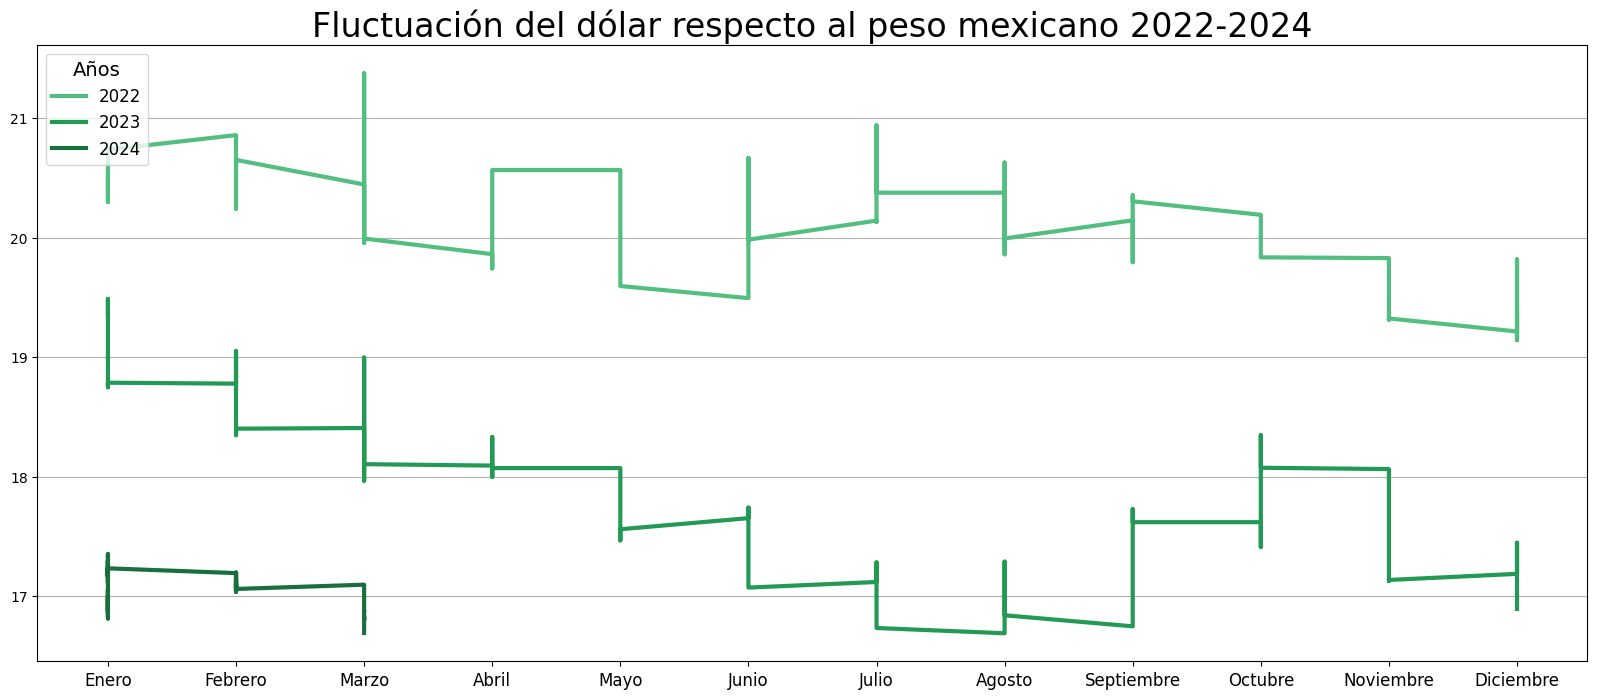

In [ ]:
#df = df.groupby([df['Fecha'].dt.to_period('M')]).size().reset_index(name = 'total')

colors = [
    "#52BE80", # 2022
    "#229954", # 2023
    "#196F3D" # 2024

]
df_temp = pd.DataFrame()

df_temp['Año'] = df['Fecha'].dt.year
df_temp['Mes'] = df['Fecha'].dt.month
df_temp['Día'] = df['Fecha'].dt.day
df_temp['Cambio'] = df['Cambio']
annios = df_temp['Año'].unique()
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

fig, ax = plt.subplots(figsize = (20, 16))
fig.set_size_inches(20, 8)

[ax.plot(df_temp[df_temp['Año'] == a]['Mes'], df_temp[df_temp['Año'] == a]['Cambio'], lw = 3 ,color = colors[a-2022], label = a) for a in annios]

ax.grid(axis = 'y')
ax.set_title('Fluctuación del dólar respecto al peso mexicano 2022-2024', fontsize = 24)
ax.set_xticks(range(1, 13))
#ax.set_yticks(range(0, 22, 0.5))
ax.set_xticklabels(meses, fontsize = 12)
#ax.set_xticklabels('Pesos', fontsize = 12)
ax.legend(title = 'Años',  loc = 'upper left', title_fontsize = 14, fontsize = 12)
plt.show()